In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os
import opendatasets as od


In [3]:
dataset="https://www.kaggle.com/datasets/senapatirajesh/netflix-tv-shows-and-movies"
od.download(dataset)

Skipping, found downloaded files in ".\netflix-tv-shows-and-movies" (use force=True to force download)


In [4]:
df=pd.read_csv("netflix-tv-shows-and-movies/NetFlix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [5]:
df.info()
#having null value in director,cast ,country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [6]:
df=df.drop(["description","show_id"],axis=1)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers"
2,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies"
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies
4,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV"
...,...,...,...,...,...,...,...,...,...,...
7782,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV"
7783,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows"
7784,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies"
7785,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies"


In [7]:
df=df.drop(df[(df['director'].isnull()) & (df['cast'].isnull()) & (df['country'].isnull())].index)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers"
2,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies"
3,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies
4,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV"
...,...,...,...,...,...,...,...,...,...,...
7782,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV"
7783,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows"
7784,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies"
7785,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies"


In [8]:
df["date_added"]=pd.to_datetime(df["date_added"])
df["date_added"].dtypes

dtype('<M8[ns]')

In [29]:
df["rating"].unique()

array(['TV-MA', 'TV-PG', 'R', 'TV-G', 'PG-13', 'TV-14', 'TV-Y', 'PG',
       'TV-Y7', 'NR', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [36]:
df["rating"]=df["rating"].replace({'nan':'NR','UR':'NR'})

<AxesSubplot: xlabel='count', ylabel='rating'>

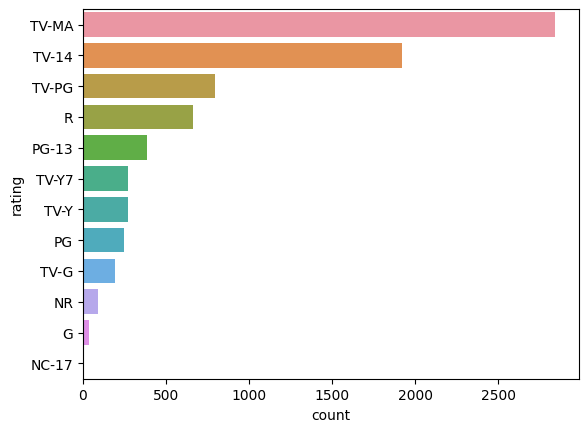

In [37]:
df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA','TV-Y7-FV': 'TV-Y7'})

sns.countplot(data=df,y="rating", order=df["rating"].value_counts().index)

In [10]:
df["date_added"].dt.year.unique()


array([2020., 2017., 2019., 2016., 2018., 2021., 2015., 2014., 2013.,
       2012., 2008., 2011.,   nan, 2009., 2010.])

In [11]:
df[df["genres"].str.contains("Action+")]["genres"]


6                            Action & Adventure, Comedies
28      Action & Adventure, Comedies, International Mo...
44      Action & Adventure, Comedies, International Mo...
45      Action & Adventure, Comedies, International Mo...
49             Action & Adventure, Classic Movies, Dramas
                              ...                        
7760    Action & Adventure, Anime Features, Sci-Fi & F...
7761    Action & Adventure, Anime Features, Sci-Fi & F...
7766    Action & Adventure, Comedies, International Mo...
7769    Action & Adventure, Comedies, International Mo...
7773             Action & Adventure, International Movies
Name: genres, Length: 870, dtype: object

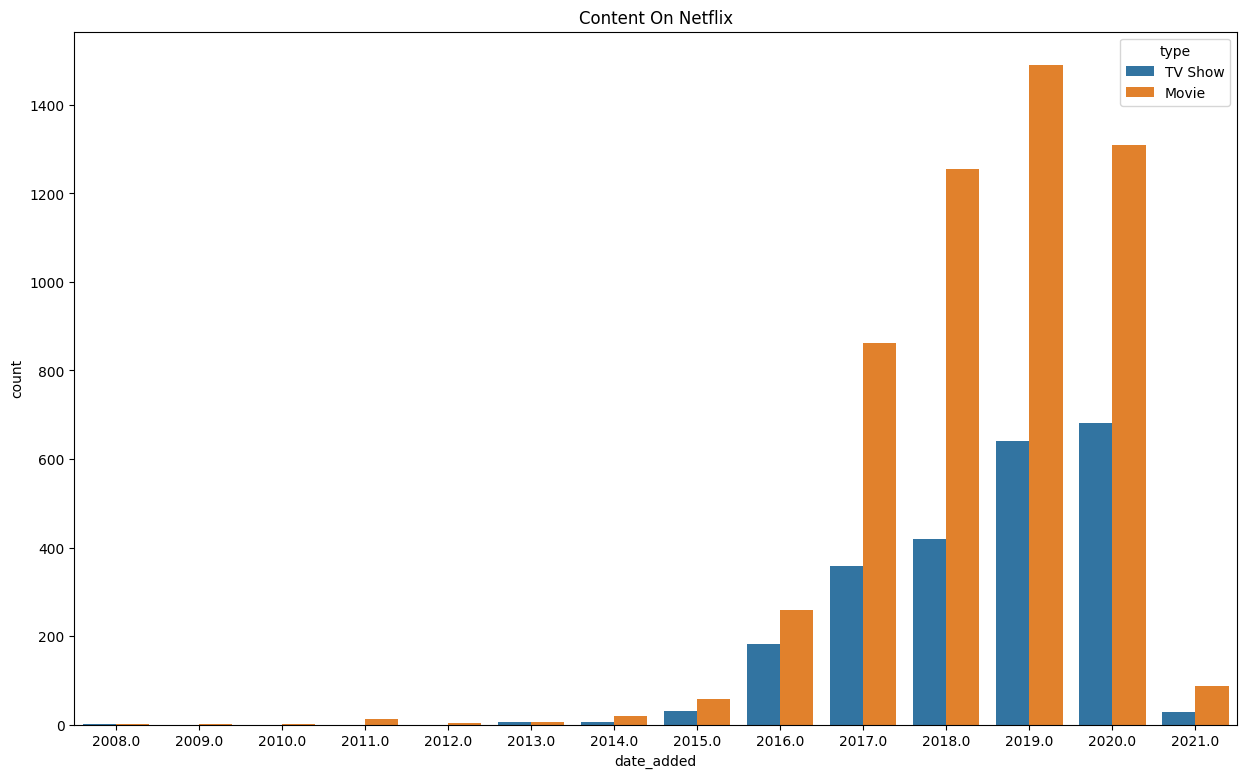

In [12]:
fig = plt.figure(figsize=(15,9))
plt.title("Content On Netflix")
sns.countplot(x=df["date_added"].dt.year,hue=df["type"])
plt.show()

In [13]:
df_action=df[df["genres"].str.contains("Tv*")]["type"]

df_action

0       TV Show
1         Movie
4       TV Show
5         Movie
10      TV Show
         ...   
7777    TV Show
7779    TV Show
7780    TV Show
7782    TV Show
7783    TV Show
Name: type, Length: 2865, dtype: object

In [14]:
df["release_year"]=pd.to_datetime(df["release_year"])
df["release_year"]=df["release_year"].dt.year


<AxesSubplot: ylabel='type'>

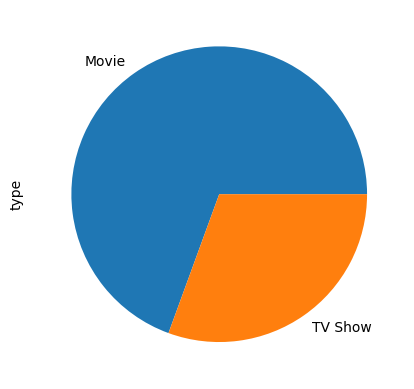

In [15]:
df['type'][:].value_counts().plot(kind='pie',)


In [16]:
##### SHOW ACTION MOVIE IN US & UK ############# 

df_action =df[df["genres"].str.contains("Action,*")]
df_action=df_action.drop(df_action[df_action['country'].isnull()].index)
df_action


,type,title,director,cast,country,date_added,release_year,rating,duration,genres
6,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",2021-01-01,1970,PG-13,94,"Action & Adventure, Comedies"
28,Movie,Bodyguard,Siddique,"Salman Khan, Kareena Kapoor, Raj Babbar, Asran...",India,2020-11-19,1970,TV-14,130,"Action & Adventure, Comedies, International Mo..."
44,Movie,Bon Cop Bad Cop 2,Alain Desrochers,"Patrick Huard, Colm Feore, Marc Beaupré, Noam ...",Canada,2017-11-11,1970,TV-MA,126,"Action & Adventure, Comedies, International Mo..."
45,Movie,"Bon Cop, Bad Cop",Erik Canuel,"Patrick Huard, Colm Feore, Sylvain Marcel, Luc...",Canada,2017-03-15,1970,TV-MA,117,"Action & Adventure, Comedies, International Mo..."
49,Movie,Bonnie and Clyde,Arthur Penn,"Warren Beatty, Faye Dunaway, Michael J. Pollar...",United States,2021-01-01,1970,R,111,"Action & Adventure, Classic Movies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
7760,Movie,Bleach The Movie: Fade to Black,Noriyuki Abe,"Masakazu Morita, Fumiko Orikasa, Aya Hirano, H...",Japan,2016-10-15,1970,TV-PG,94,"Action & Adventure, Anime Features, Sci-Fi & F..."
7761,Movie,Bleach the Movie: Hell Verse,Noriyuki Abe,"Masakazu Morita, Fumiko Orikasa, Kazuya Nakai,...",Japan,2016-10-15,1970,TV-14,94,"Action & Adventure, Anime Features, Sci-Fi & F..."
7766,Movie,Blind Detective,Johnnie To,"Andy Lau, Sammi Cheng, Gao Yuanyuan, Guo Tao, ...","Hong Kong, China",2018-12-01,1970,TV-MA,130,"Action & Adventure, Comedies, International Mo..."
7769,Movie,Blitz Patrollie,Andrew Wessels,"Joey Rasdien, David Kau, David Kibuuka, Chris ...",South Africa,2019-12-27,1970,TV-MA,102,"Action & Adventure, Comedies, International Mo..."


In [19]:
####which more country make a Comedies####

df_comedies =df[df["genres"].str.contains("Comedies,")]
df_comedies=df_comedies.drop(df_comedies[df_comedies['country'].isnull()].index)

df_comedies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 8 to 7785
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          1238 non-null   object        
 1   title         1238 non-null   object        
 2   director      1116 non-null   object        
 3   cast          1232 non-null   object        
 4   country       1238 non-null   object        
 5   date_added    1236 non-null   datetime64[ns]
 6   release_year  1238 non-null   int64         
 7   rating        1238 non-null   object        
 8   duration      1238 non-null   int64         
 9   genres        1238 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 106.4+ KB


In [20]:
### 
x=df_comedies["country"].tolist()
List=[]
for i in range(len(x)):
    if ',' in x[i]:
        List.append(x[i].split(","))
    else:
        List.append(x[i])
        
List

['India',
 'India',
 'India',
 'India',
 'Germany',
 'India',
 'Spain',
 ['United Arab Emirates', ' United Kingdom', ' India'],
 'Netherlands',
 'Canada',
 'Canada',
 'Egypt',
 'United States',
 'Philippines',
 'India',
 'Egypt',
 'United States',
 ['India', ' United Kingdom'],
 'United States',
 ['France', ' Belgium'],
 'India',
 'Hong Kong',
 'United Kingdom',
 'Philippines',
 'Indonesia',
 'India',
 'Turkey',
 ['France', ' Belgium'],
 'Brazil',
 'Spain',
 'Kuwait',
 'Turkey',
 'United States',
 'India',
 'Argentina',
 ['United Kingdom', ' Pakistan'],
 'France',
 'United States',
 'United States',
 'United States',
 'Canada',
 'Ireland',
 'United States',
 'Philippines',
 'Egypt',
 'Italy',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'South Africa',
 'United States',
 'Romania',
 'India',
 'India',
 'India',
 'India',
 'Pakistan',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Indonesia',
 'United State

In [21]:
## flatten 2dList in 1d ### 
flattenList=[]
for x in List:
    if type(x)==list:
        for j in x:
            flattenList.append(j)
    
    else:
        flattenList.append(x)

### remove left space in item list        
for x in range(len(flattenList)):
    
    flattenList[x]=flattenList[x].lstrip()

flattenList

['India',
 'India',
 'India',
 'India',
 'Germany',
 'India',
 'Spain',
 'United Arab Emirates',
 'United Kingdom',
 'India',
 'Netherlands',
 'Canada',
 'Canada',
 'Egypt',
 'United States',
 'Philippines',
 'India',
 'Egypt',
 'United States',
 'India',
 'United Kingdom',
 'United States',
 'France',
 'Belgium',
 'India',
 'Hong Kong',
 'United Kingdom',
 'Philippines',
 'Indonesia',
 'India',
 'Turkey',
 'France',
 'Belgium',
 'Brazil',
 'Spain',
 'Kuwait',
 'Turkey',
 'United States',
 'India',
 'Argentina',
 'United Kingdom',
 'Pakistan',
 'France',
 'United States',
 'United States',
 'United States',
 'Canada',
 'Ireland',
 'United States',
 'Philippines',
 'Egypt',
 'Italy',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'South Africa',
 'United States',
 'Romania',
 'India',
 'India',
 'India',
 'India',
 'Pakistan',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'Indonesia',
 'United States',
 'Indi

In [22]:
counts = dict()

for i in flattenList:
  counts[i] = counts.get(i, 0) + 1
counts

{'India': 306,
 'Germany': 28,
 'Spain': 41,
 'United Arab Emirates': 10,
 'United Kingdom': 49,
 'Netherlands': 6,
 'Canada': 48,
 'Egypt': 59,
 'United States': 406,
 'Philippines': 27,
 'France': 44,
 'Belgium': 14,
 'Hong Kong': 29,
 'Indonesia': 14,
 'Turkey': 58,
 'Brazil': 17,
 'Kuwait': 3,
 'Argentina': 13,
 'Pakistan': 7,
 'Ireland': 6,
 'Italy': 11,
 'South Africa': 15,
 'Romania': 4,
 'Nigeria': 29,
 'Mexico': 20,
 'Zimbabwe': 1,
 'Taiwan': 5,
 'Colombia': 7,
 'Kenya': 1,
 'China': 21,
 'South Korea': 9,
 'Poland': 4,
 'Jordan': 2,
 'Lebanon': 4,
 'Chile': 7,
 'Malaysia': 7,
 'Denmark': 3,
 'Thailand': 13,
 'Slovenia': 1,
 'Croatia': 1,
 'Czech Republic': 2,
 'Qatar': 2,
 'Peru': 3,
 'New Zealand': 2,
 'Finland': 1,
 'Vietnam': 2,
 'Sweden': 5,
 'Portugal': 1,
 'Japan': 5,
 'Australia': 11,
 'Norway': 3,
 'Nepal': 2,
 'Uruguay': 3,
 'Israel': 2,
 'Saudi Arabia': 5,
 'Switzerland': 3,
 'Ghana': 2,
 'Bangladesh': 1,
 'Greece': 1}

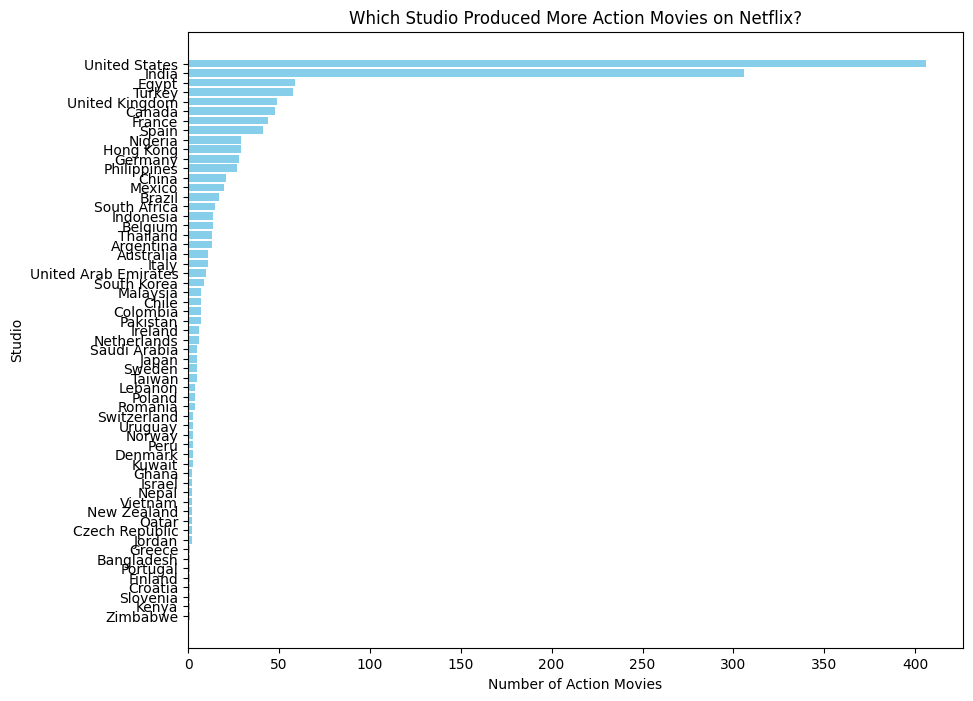

In [33]:

myList = counts.items()
myList = sorted(myList, key=lambda item: item[1])  # Sort by values (counts)

x, y = zip(*myList)

fig = plt.figure(figsize=(10, 8))
plt.barh(x, y, color='skyblue')  

plt.xlabel('Number of Action Movies')
plt.ylabel('Studio')
plt.title("Which Studio Produced More Action Movies on Netflix?")
plt.show()

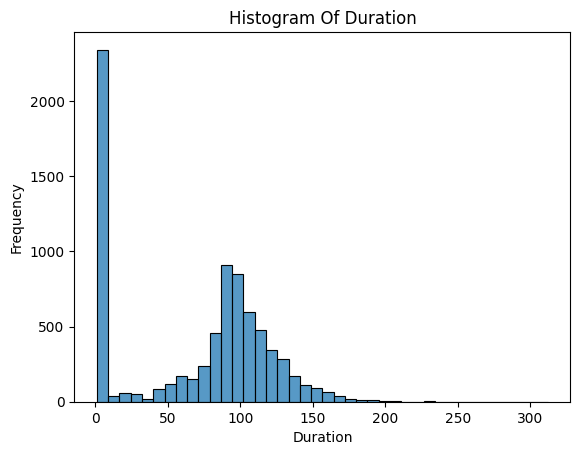

In [38]:
sns.histplot(df['duration'],bins=40)

plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram Of Duration")

# Display the plot
plt.show()